In [2]:
# Import datasets

import pandas as pd
import numpy as np
from pathlib import Path
import get_reversions as gr
import matplotlib.pyplot as plt


gt = 'Greta Thunberg'
nk = 'Naomi Klein'

# Define the path

path_dataset = Path().cwd().parent / 'oii-fsds-wikipedia-main' / 'DataFrames'

# Import both datasets

greta = pd.read_feather(path_dataset / 'Greta Thunberg.feather')
naomi = pd.read_feather(path_dataset / 'Naomi Klein.feather')

# Add a new column to each DataFrame to indicate the source
greta['environmentalist'] = gt
naomi['environmentalist'] = nk



# Merge both
compared = pd.concat([greta, naomi], axis=0, ignore_index=True)


In [3]:
reversion = gr.get_revisions(compared)

/Users/chicokerche/Library/CloudStorage/OneDrive-Pessoal/10_Oxford/Classes/MT/Fundamental_python/week_2/goup-wikipedia-revisions-project/analysis/get_reversions.py:13: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  reversions = df[df['comment'].str.lower().str.contains('(revert(ed)?|undid)', regex=True, na=False)].copy()


/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_33797/3486363236.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([greta_data, naomi_data], labels=['Greta Thunberg', 'Naomi Klein'])


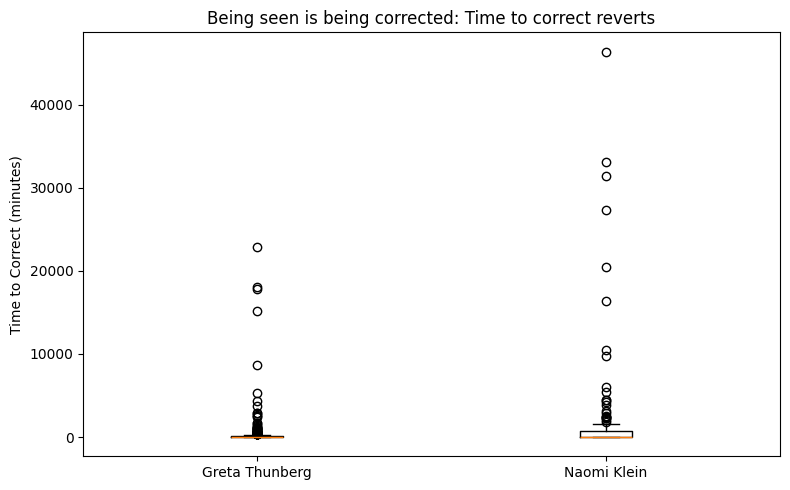

In [44]:
# Prepare data for the boxplot, removing NaN values
greta_data = reversion[reversion['environmentalist'] == gt]['time_to_correct'].dropna().dt.total_seconds() / 60
naomi_data = reversion[reversion['environmentalist'] == nk]['time_to_correct'].dropna().dt.total_seconds() / 60

# Set up the figure and axis for a single boxplot
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the boxplot with both datasets
ax.boxplot([greta_data, naomi_data], labels=['Greta Thunberg', 'Naomi Klein'])

# Set the title and labels
ax.set_title('Being seen is being corrected: Time to correct reverts')
ax.set_ylabel('Time to Correct (minutes)')

# Show the plot
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(Path().cwd().parent / "figures" / "boxplot_corrections.svg", format="svg")

plt.show()


In [5]:
reversion.groupby('environmentalist')['time_to_correct'].describe().unstack()

       environmentalist
count  Greta Thunberg                            380
       Naomi Klein                               122
mean   Greta Thunberg      0 days 06:40:47.971052631
       Naomi Klein         1 days 11:39:08.704918032
std    Greta Thunberg      1 days 09:34:52.330182815
       Naomi Klein         4 days 16:38:02.259409128
min    Greta Thunberg                0 days 00:00:01
       Naomi Klein                   0 days 00:00:09
25%    Greta Thunberg                0 days 00:03:00
       Naomi Klein                   0 days 00:05:37
50%    Greta Thunberg                0 days 00:14:37
       Naomi Klein                   0 days 00:32:15
75%    Greta Thunberg         0 days 02:03:29.250000
       Naomi Klein            0 days 11:03:44.250000
max    Greta Thunberg               15 days 21:24:50
       Naomi Klein                  32 days 05:39:27
dtype: object

/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_33797/1385880213.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reversion[reversion['environmentalist'] == gt][["timestamp", "revision_id"]].resample('M',
/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_33797/1385880213.py:9: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  reversion[reversion['environmentalist'] == nk][["timestamp", "revision_id"]].resample('M',
/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_33797/1385880213.py:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  greta[["timestamp", "revision_id"]].resample('M',
/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_33797/1385880213.py:26: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  naomi[["timestamp", "revision_id"]

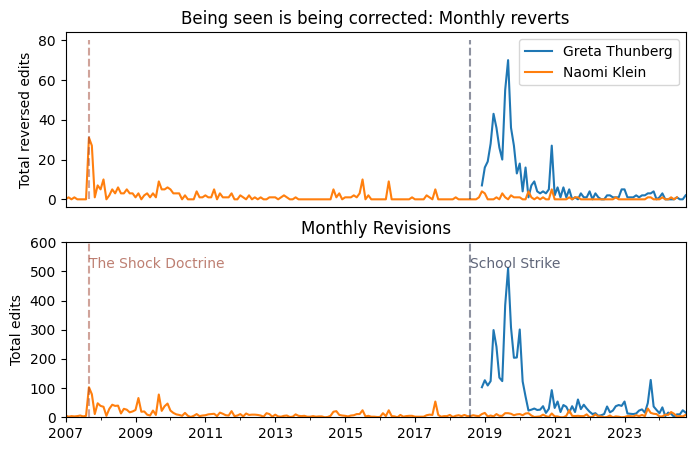

In [45]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 5))

schok_date = '2007-09-04'
school_strike = '2018-08-20'


reversion[reversion['environmentalist'] == gt][["timestamp", "revision_id"]].resample('M', 
    on="timestamp").count().plot(ax=ax1,legend=False).set_xlabel(None)
reversion[reversion['environmentalist'] == nk][["timestamp", "revision_id"]].resample('M', 
    on="timestamp").count().plot(ax=ax1,legend=False).set_xlabel(None)
ax1.vlines(x=schok_date, ymin=0, ymax=80, color='#A24936', linestyle='--', label='The Schok Doctrine',
          alpha=0.5)
ax1.vlines(x=school_strike, ymin=0, ymax=80, color='#1C2541', linestyle='--', label='School Strike',
          alpha=0.5)
ax1.set_ylabel("Total reversed edits")
ax1.set_xlim('2007-01-01', '2024-10-01')
ax1.legend(["Greta Thunberg", "Naomi Klein"])
ax1.set_title("Being seen is being corrected: Monthly reverts") 

# Remove x-axis ticks and labels for ax1
ax1.set_xticklabels([])
ax1.tick_params(axis="x", which="both", length=0)

greta[["timestamp", "revision_id"]].resample('M', 
    on="timestamp").count().plot(ax=ax2,legend=False).set_xlabel(None)
naomi[["timestamp", "revision_id"]].resample('M', 
    on="timestamp").count().plot(ax=ax2,legend=False).set_xlabel(None)
ax2.vlines(x=schok_date, ymin=0, ymax=600, color='#A24936', linestyle='--', label='The Schok Doctrine',
          alpha=0.5)
ax2.text(pd.Timestamp(schok_date), 550, 'The Shock Doctrine', color='#A24936', ha='left', va='top', alpha=0.7)
ax2.vlines(x=school_strike, ymin=0, ymax=600, color='#1C2541', linestyle='--', label='School Strike',
          alpha=0.5)
ax2.text(pd.Timestamp(school_strike), 550, 'School Strike', color='#1C2541', ha='left', va='top', alpha=0.7)
ax2.set_ylim(0, 600)
ax2.set_xlim('2007-01-01', '2024-10-01')
ax2.set_ylabel("Total edits")
ax2.set_title("Monthly Revisions")

# Save the plot as an SVG file
plt.savefig(Path().cwd().parent / "figures" / "monthly_revisions.svg", format="svg")


In [37]:
both_author = list(set(greta[greta['username'].isin(naomi['username'])].dropna(subset='username')['username']))

/var/folders/py/8cmy68td2sb8gx2cm3jt84wh0000gn/T/ipykernel_33797/498285649.py:12: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(boxplot_data, labels=['Just one', 'Both pages'])


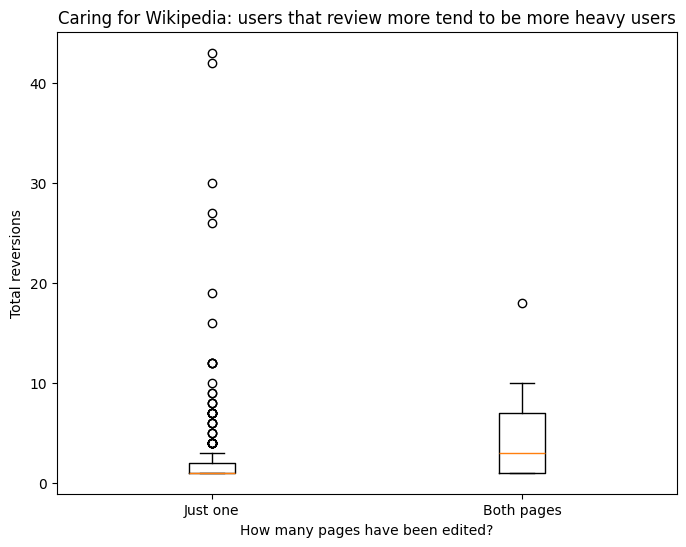

In [46]:
reversion['in_both'] = reversion['username'].isin(both_author)

# Group by 'username' and 'in_both', then get the size (counts per group)
grouped_counts = reversion.groupby(['username', 'in_both']).size().reset_index(name='count')


# Prepare the data for boxplot, separating by 'in_both' values
boxplot_data = grouped_counts.groupby('in_both')['count'].apply(list)

# Plot the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(boxplot_data, labels=['Just one', 'Both pages'])
plt.xlabel("How many pages have been edited?")
plt.ylabel("Total reversions")
plt.title("Caring for Wikipedia: users that review more tend to be more heavy users")

# Save the plot as an SVG file
plt.savefig(Path().cwd().parent / "figures" / "boxplot_user_frequency.svg", format="svg")


plt.show()